In [1]:
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import numpy as np
import warnings 
warnings.filterwarnings(action='ignore')

In [2]:
import sklearn
print(sklearn.__version__)

1.2.0


In [3]:
#使用pandas讀取csv檔案
df = pd.read_csv(r'c:\pyml_scripts\chapter02_regression\wslw.csv',names=['Long','Width'])

In [4]:
#顯示前五筆資料,df.tail(5)則為顯示最後五筆資料
df.head(5)

,Long,Width
0,208,21.6
1,152,15.5
2,113,10.4
3,227,31.0
4,137,13.0


In [5]:
df[['Long']]

,Long
0,208
1,152
2,113
3,227
4,137
5,238
6,178
7,104
8,191
9,130


In [6]:
# y = f(X),希望得到一個函數,能夠輸入x值,自動計算出正確的y值
X = df[['Long']].values   #df.values將DataFrame變成Numpy的ndArray
y = df[['Width']].values  #scikit-learn的演算法可以直接使用DataFrame內容

In [7]:
X

array([[208],
       [152],
       [113],
       [227],
       [137],
       [238],
       [178],
       [104],
       [191],
       [130],
       [150],
       [100],
       [200],
       [150],
       [170]], dtype=int64)

In [8]:
X.shape #2維陣列,scikit-learn 0.18以後,要求X必須為2維陣列

(15, 1)

In [9]:
print(X.max(),X.min(),sep='\n')

238
100


In [10]:
y

array([[21.6],
       [15.5],
       [10.4],
       [31. ],
       [13. ],
       [32.4],
       [19. ],
       [10.4],
       [19. ],
       [11.8],
       [16. ],
       [ 9.5],
       [28.3],
       [20.1],
       [22.6]])

In [11]:
print(y.max(),y.min(),sep='\n')

32.4
9.5


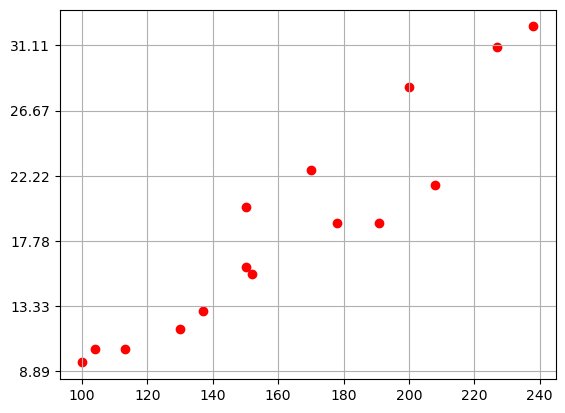

In [12]:
plt.figure()
plt.yticks(np.linspace(0,40,10))
plt.scatter(X,y,c='red')         #以X當作x軸資料,y當作y軸資料
plt.grid(True)
plt.show()

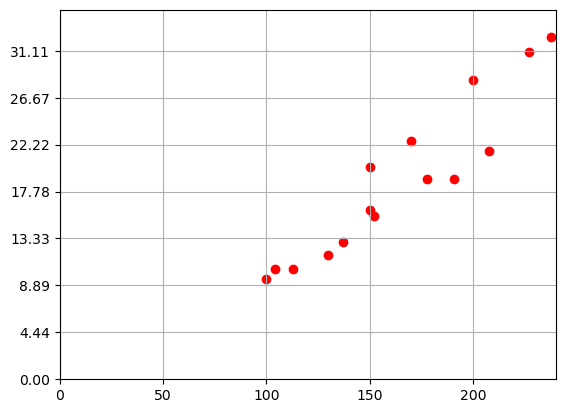

In [13]:
#散點圖的x,y軸不需要從0開始,因為散點圖用來顯示兩個變數的關係(x,y)
plt.figure()
plt.yticks(np.linspace(0,40,10))
plt.xlim(0,240)
plt.ylim(0,35)
plt.scatter(X,y,c='red') 
plt.grid(True)
plt.show()

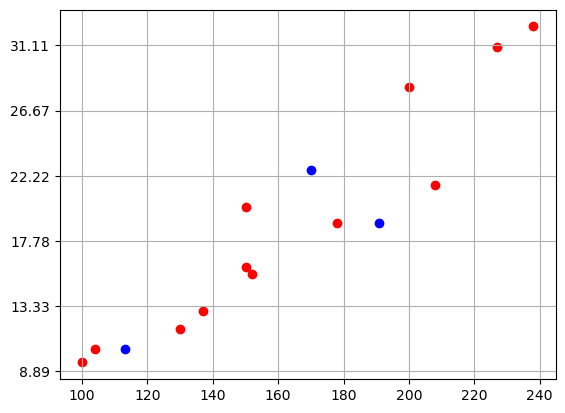

In [14]:
#將資料集分為訓練資料與測試資料(80/20)
#random_state若相同，可以確保每次執行時，訓練/測試資料都是相同分割結果
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

#使用訓練資料/測試資料繪製散點圖
plt.figure()
plt.yticks(np.linspace(0,40,10))
plt.scatter(X_train,y_train,c='red')    #訓練資料
plt.scatter(X_test,y_test,c='blue')     #測試資料
plt.grid(True)
plt.show()

In [15]:
#使用最小平方法且不使用regularization(L1/L2)=>y=ax+b,不使用隨機誤差
lr = linear_model.LinearRegression()

In [16]:
#訓練前,是演算法
lr

LinearRegression()

In [17]:
#以X為特徵陣列,y為目標陣列進行訓練,此指令執行完成後,lr成為模型(model:trained algorithm)
lr.fit(X_train,y_train)  

LinearRegression()

In [18]:
#訓練後,lr變成模型
lr

LinearRegression()

In [19]:
# y=係數*X+截距
print('係數:',lr.coef_)
print('截距',lr.intercept_)

係數: [[0.16513247]]
截距 [-8.11429069]


In [20]:
#顯示模型多麼擬合訓練資料score(X_train,y_train)
#score先將X_train帶入模型得到預測y,再與y_train進行比較,得到分數
#regression預設使用的分數為決定係數(0~1,約接近1越好)
lr.score(X_train,y_train)

0.9067487282609434

In [21]:
#使用X_test與y_test測試模型對未曾訓練過的資料的預測能力(泛化能力)
lr.score(X_test,y_test)

0.661650669557026

In [22]:
#使用predict進行預測,請注意scikit-learn 0.19後,X須為2維陣列格式
lr.predict([[100]])

array([[8.39895593]])

In [23]:
#請注意訓練後的係數與截距可能與此處不同
print(0.16440079*100+(-8.42893334))

8.01114566


In [24]:
#使用前面fit(X,y)後所學習到的函數,對X進行預測
pred_y = lr.predict(X_train)

#根據訓練結果所計算出的y值
pred_y

array([[16.65557924],
       [24.91220255],
       [ 8.39895593],
       [14.50885718],
       [ 9.0594858 ],
       [31.18723626],
       [26.23326228],
       [16.65557924],
       [13.35292992],
       [21.27928829],
       [16.98584417],
       [29.37077914]])

In [25]:
#真實y
y_train

array([[20.1],
       [28.3],
       [ 9.5],
       [13. ],
       [10.4],
       [32.4],
       [21.6],
       [16. ],
       [11.8],
       [19. ],
       [15.5],
       [31. ]])

### 如果訓練誤差(lr.score(X_train,y_train)<測試誤差(lr.X_test,y_test),稱為過度擬合(Overfit)
### 若為過度擬合,可以考慮使用Lasso,Ridge,Elastic-Net等,會自動加上隨機誤差的回歸演算法
### 請注意有時候與資料切分為training/test的方式有關係

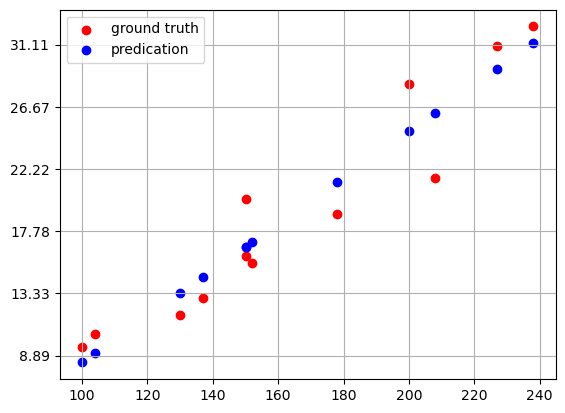

In [26]:
plt.figure()
plt.yticks(np.linspace(0,40,10))
plt.scatter(X_train,y_train,c='red',label='ground truth')               #以X當作x軸資料,真實y當作y軸資料
plt.grid(True)
plt.scatter(X_train,pred_y,c='blue',label='predication')                #以X當作x軸資料,預測y當作y軸資料
plt.legend()
plt.show()

In [27]:
lr.score(X_test,y_test) #驗證模型正確性,不同模型有不同的驗證指標
                        #linearRegression預設使用決定係數(R2)當作指標,越接近1越好
                        #model.score(X_test,y_test)將X_test帶入模型得到預測y,將其與真實y_test進行比較,計算出模型指標
                        #其實就是真實y與預測y的差異比較

0.661650669557026

In [28]:
from sklearn.dummy import DummyRegressor
clf_dummy = DummyRegressor(strategy='mean')   #任何輸入都回傳train_y的平均值
clf_dummy.fit(X_train,y_train)
clf_dummy.predict(X_train)

array([19.05, 19.05, 19.05, 19.05, 19.05, 19.05, 19.05, 19.05, 19.05,
       19.05, 19.05, 19.05])

In [29]:
clf_dummy.score(X_test,y_test)    #你的模型應該要比dummy好

-0.11249787919918575

In [30]:
new_Y = lr.predict([[200]]) #fit後,model已經訓練完成,使用predict產生預測值
print(new_Y)

[[24.91220255]]


In [31]:
print(clf_dummy.predict([[200]]))

[19.05]


In [32]:
new_Y = lr.predict([[208]])
print(new_Y)

[[26.23326228]]


In [33]:
print(clf_dummy.predict([[208]]))

[19.05]


In [34]:
new_x = np.linspace(X.min(),X.max()).reshape(-1,1)  #reshape(-1,1)將new_x變成2維陣列
new_y = lr.predict(new_x)                    #使用模型得到y值

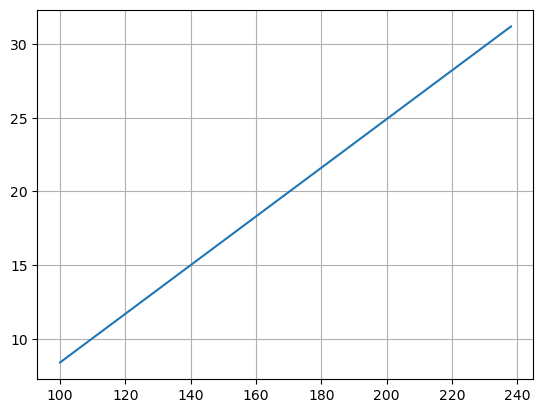

In [35]:
plt.figure()
plt.plot(new_x,new_y)    #繪製模型對應的迴歸線,plot畫折線圖,折線圖先畫點,再將兩點連成一線,以此類推
plt.grid(True)
plt.show()

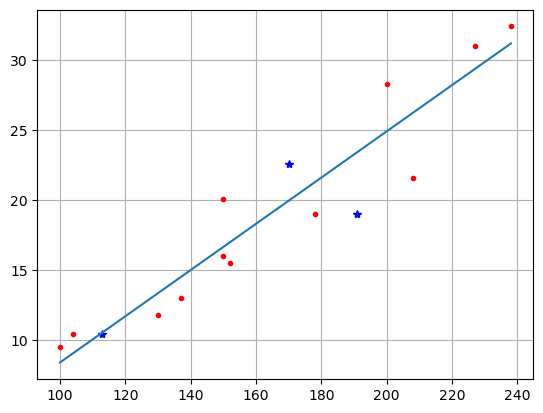

In [36]:
plt.plot(X_train,y_train,c='red',marker='.',linestyle='')  #只是示範plot也可畫點,不畫線
plt.plot(X_test,y_test,c='blue',marker='*',linestyle='')
plt.plot(new_x,new_y)
plt.grid(True)
plt.show()

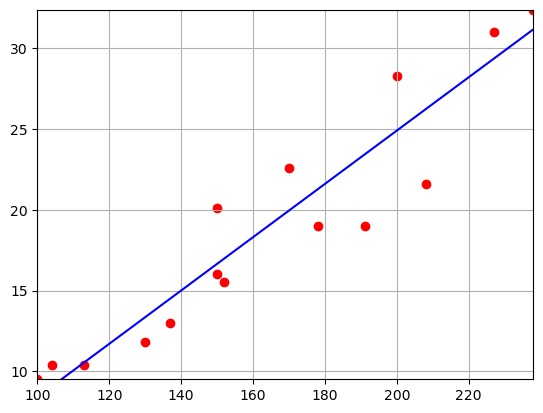

In [37]:
plt.figure()
plt.scatter(X,y,c='red') 
plt.plot(new_x,new_y,c='blue')
plt.axis([X.min(),X.max(),y.min(),y.max()])
plt.grid(True)
plt.show()

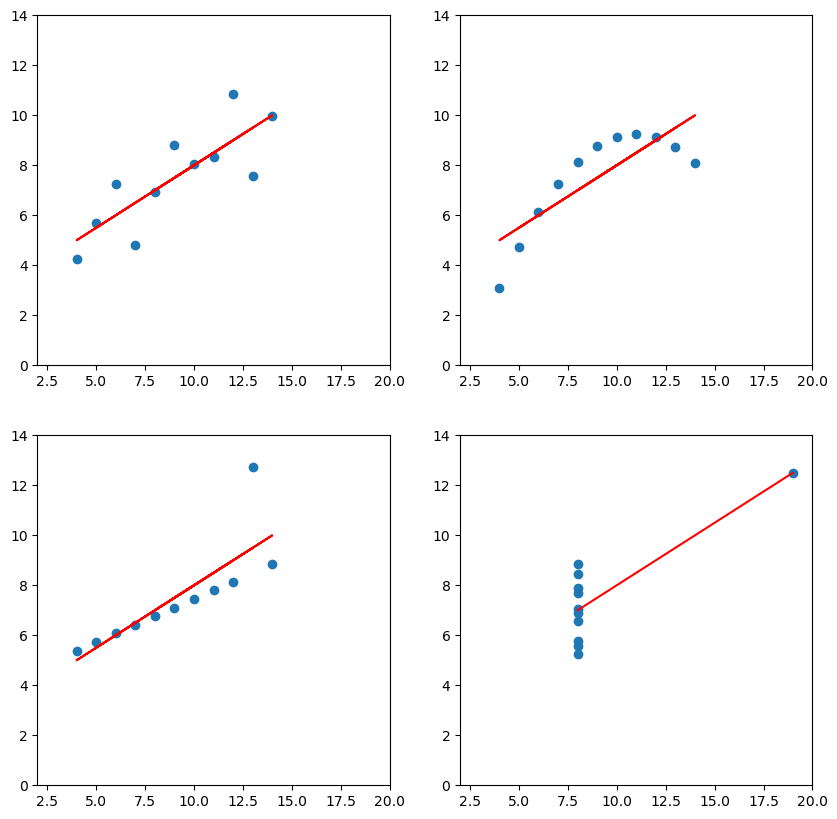

In [38]:
import numpy as np
import matplotlib.pyplot as plt

xs = np.loadtxt(r'C:\pyml_scripts\chapter02_regression\anscombe.txt')
plt.figure(figsize=(10,10))
for i in range(4):
    Xs = xs[:,i*2]
    ys = xs[:,i*2+1]
    A = np.vstack([Xs, np.ones(len(Xs))]).T
    m, c = np.linalg.lstsq(A, ys)[0]

    plt.subplot(2,2,i+1)
    plt.scatter(Xs, ys)
    plt.plot(Xs, m*Xs+c, 'r')
    plt.axis([2,20,0,14])

plt.show()